# Import

```Python
import cv2
import matplotlib.pyplot as plt
import numpy as np
from os import listdir, path, makedirs
from os.path import isfile, join

import shutil

from sklearn.metrics import accuracy_score
```

In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
from os import listdir, path, makedirs
from os.path import isfile, join

import shutil

from sklearn.metrics import accuracy_score

# Viewing the dataset
```Python

imagem_face_1 = cv2.imread("imagens/cropped_faces/s01_01.jpg")
imagem_face_1 = cv2.cvtColor(imagem_face_1, cv2.COLOR_BGR2RGB)

imagem_face_2 = cv2.imread("imagens/cropped_faces/s02_01.jpg")
imagem_face_2 = cv2.cvtColor(imagem_face_2, cv2.COLOR_BGR2RGB)

imagem_face_3 = cv2.imread("imagens/cropped_faces/s03_01.jpg")
imagem_face_3 = cv2.cvtColor(imagem_face_3, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(20,10))
plt.subplot(131)
plt.title("Person 01")
plt.imshow(imagem_face_1)
plt.subplot(132)
plt.title("Person 02")
plt.imshow(imagem_face_2)
plt.subplot(133)
plt.title("Person 03")
plt.imshow(imagem_face_3)

plt.show()
```

In [2]:
imagem_face_1 = cv2.imread("imagens/cropped_faces/s01_01.jpg")
imagem_face_1 = cv2.cvtColor(imagem_face_1, cv2.COLOR_BGR2RGB)

imagem_face_2 = cv2.imread("imagens/cropped_faces/s02_01.jpg")
imagem_face_2 = cv2.cvtColor(imagem_face_2, cv2.COLOR_BGR2RGB)

imagem_face_3 = cv2.imread("imagens/cropped_faces/s03_01.jpg")
imagem_face_3 = cv2.cvtColor(imagem_face_3, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(20,10))
plt.subplot(131)
plt.title("Sujeito 01")
plt.imshow(imagem_face_1)
plt.subplot(132)
plt.title("Sujeito 02")
plt.imshow(imagem_face_2)
plt.subplot(133)
plt.title("Sujeito 03")
plt.imshow(imagem_face_3)

plt.show()

[ WARN:0@1.004] global /io/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('imagens/cropped_faces/s01_01.jpg'): can't open/read file: check file path/integrity


error: OpenCV(4.6.0) /io/opencv/modules/imgproc/src/color.cpp:182: error: (-215:Assertion failed) !_src.empty() in function 'cvtColor'


Visualize the shapes of images

In [3]:
imagem_face_1.shape

AttributeError: 'NoneType' object has no attribute 'shape'

In [8]:
imagem_face_2.shape

(211, 141, 3)

In [9]:
imagem_face_3.shape

(196, 141, 3)

Create a list with the name of all the files
```Python
faces_caminho = "imagens/cropped_faces/"
lista_arq_faces = [f for f in listdir(faces_caminho) if isfile(join(faces_caminho, f))]
```

In [10]:
faces_caminho = "imagens/cropped_faces/"
lista_arq_faces = [f for f in listdir(faces_caminho) if isfile(join(faces_caminho, f))]

Visualize the first element of list

In [11]:
lista_arq_faces[0]

's35_15.jpg'

View the size of the list

In [12]:
len(lista_arq_faces)

750

Separate files into training and test
```Python
faces_path_treino = "imagens/treino/"
faces_path_teste = "imagens/teste/"

if not path.exists(faces_path_treino):
    makedirs(faces_path_treino)

if not path.exists(faces_path_teste):
    makedirs(faces_path_teste)

for arq in lista_arq_faces:
    sujeito = arq[1:3]
    numero = arq[4:6]
    
    if int(numero) <= 10:
        shutil.copyfile(faces_caminho + arq, faces_path_treino + arq)
    else:
        shutil.copyfile(faces_caminho + arq, faces_path_teste + arq)
```

In [13]:
faces_path_treino = "imagens/treino/"
faces_path_teste = "imagens/teste/"

if not path.exists(faces_path_treino):
    makedirs(faces_path_treino)

if not path.exists(faces_path_teste):
    makedirs(faces_path_teste)

for arq in lista_arq_faces:
    sujeito = arq[1:3]
    numero = arq[4:6]
    
    if int(numero) <= 10:
        shutil.copyfile(faces_caminho + arq, faces_path_treino + arq)
    else:
        shutil.copyfile(faces_caminho + arq, faces_path_teste + arq)

Standardize the images to have the same size.
```Python
def padronizar_imagem(imagem_caminho):
    imagem = cv2.imread(imagem_caminho, cv2.IMREAD_GRAYSCALE)
    imagem = cv2.resize(imagem, (200, 200), interpolation=cv2.INTER_LANCZOS4)
    return imagem
```

In [15]:
def padronizar_imagem(imagem_caminho):
    imagem = cv2.imread(imagem_caminho, cv2.IMREAD_GRAYSCALE)
    imagem = cv2.resize(imagem, (200, 200), interpolation=cv2.INTER_LANCZOS4)
    return imagem

Create a list for the training and a list for the test and store the file names.
```Python
lista_faces_treino = [f for f in listdir(faces_path_treino) if isfile(join(faces_path_treino, f))]
lista_faces_teste = [f for f in listdir(faces_path_teste) if isfile(join(faces_path_teste, f))]
```

In [16]:
lista_faces_treino = [f for f in listdir(faces_path_treino) if isfile(join(faces_path_treino, f))]
lista_faces_teste = [f for f in listdir(faces_path_teste) if isfile(join(faces_path_teste, f))]

Display the first element of the test list and the first element of the training list.

In [17]:
lista_faces_treino[0]

's31_10.jpg'

In [18]:
lista_faces_teste[0]

's35_15.jpg'

Store the input training data and the expected output.
```Python
dados_treinamento, sujeitos = [], []
for i, arq in enumerate(lista_faces_treino):
    imagem_path = faces_path_treino + arq
    imagem = padronizar_imagem(imagem_path)
    dados_treinamento.append(imagem)
    sujeito = arq[1:3]
    sujeitos.append(int(sujeito))
```

In [19]:
dados_treinamento, sujeitos = [], []
for i, arq in enumerate(lista_faces_treino):
    imagem_path = faces_path_treino + arq
    imagem = padronizar_imagem(imagem_path)
    dados_treinamento.append(imagem)
    sujeito = arq[1:3]
    sujeitos.append(int(sujeito))

Check the size of the training set. The size of the output should be the same as the input.

In [20]:
len(dados_treinamento)

500

In [22]:
len(sujeitos)

500

Store the input teste data and the expected output.
```Python
dados_teste, sujeitos_teste = [], [] 
for i, arq in enumerate(lista_faces_teste):
    imagem_path = faces_path_teste + arq
    imagem = padronizar_imagem(imagem_path)
    dados_teste.append(imagem)
    sujeito = arq[1:3]
    sujeitos_teste.append(int(sujeito))
```

In [23]:
dados_teste, sujeitos_teste = [], [] 
for i, arq in enumerate(lista_faces_teste):
    imagem_path = faces_path_teste + arq
    imagem = padronizar_imagem(imagem_path)
    dados_teste.append(imagem)
    sujeito = arq[1:3]
    sujeitos_teste.append(int(sujeito))

Check the size of the test set. The size of the output should be the same as the input.

In [24]:
len(dados_teste)

250

In [25]:
len(sujeitos_teste)

250

Visualize the train dataset
```Python
plt.imshow(dados_treinamento[0], cmap="gray")
plt.title(sujeito[0])
```

Text(0.5, 1.0, '3')

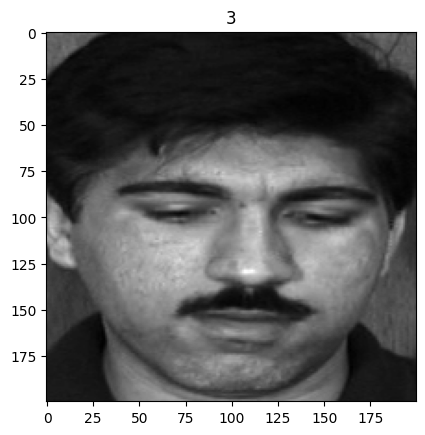

In [29]:
plt.imshow(dados_treinamento[0], cmap="gray")
plt.title(sujeito[0])

Visualize the test dataset
```Python
plt.imshow(dados_treinamento[0], cmap="gray")
plt.title(sujeito[0])
```

Text(0.5, 1.0, '35')

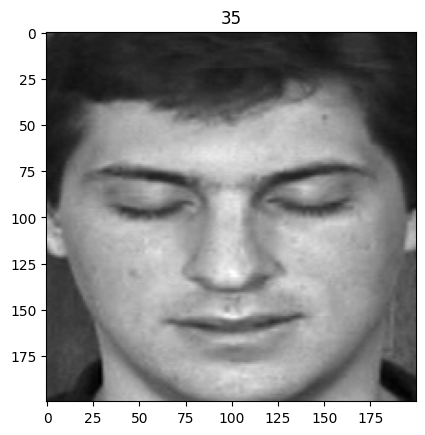

In [31]:
plt.imshow(dados_teste[0], cmap="gray")
plt.title(sujeitos_teste[0])

Convert the array to 32-bit int
```Python
sujeitos = np.asarray(sujeitos, dtype=np.int32)
sujeitos_teste = np.asarray(sujeitos_teste, dtype=np.int32)
```

In [32]:
sujeitos = np.asarray(sujeitos, dtype=np.int32)
sujeitos_teste = np.asarray(sujeitos_teste, dtype=np.int32)

Create Create an object for `cv2.face.EigenFaceRecognizer_create()`

```Python
modelo_eingenfaces = cv2.face.EigenFaceRecognizer_create()
```

In [33]:
modelo_eingenfaces = cv2.face.EigenFaceRecognizer_create()

Train the object `modelo_eingenfaces.train(dados_treinamento, sujeitos)`

In [34]:
modelo_eingenfaces.train(dados_treinamento, sujeitos)

Test for two pieces of data from the test set with the following code:
```Python
plt.figure(figsize=(20,10))

plt.subplot(121)
plt.title("Sujeito " + str(sujeitos_teste[6]))
plt.imshow(dados_teste[6], cmap="gray")

plt.subplot(122)
plt.title("Sujeito " + str(sujeitos_teste[7]))
plt.imshow(dados_teste[7], cmap="gray")

plt.show()
```

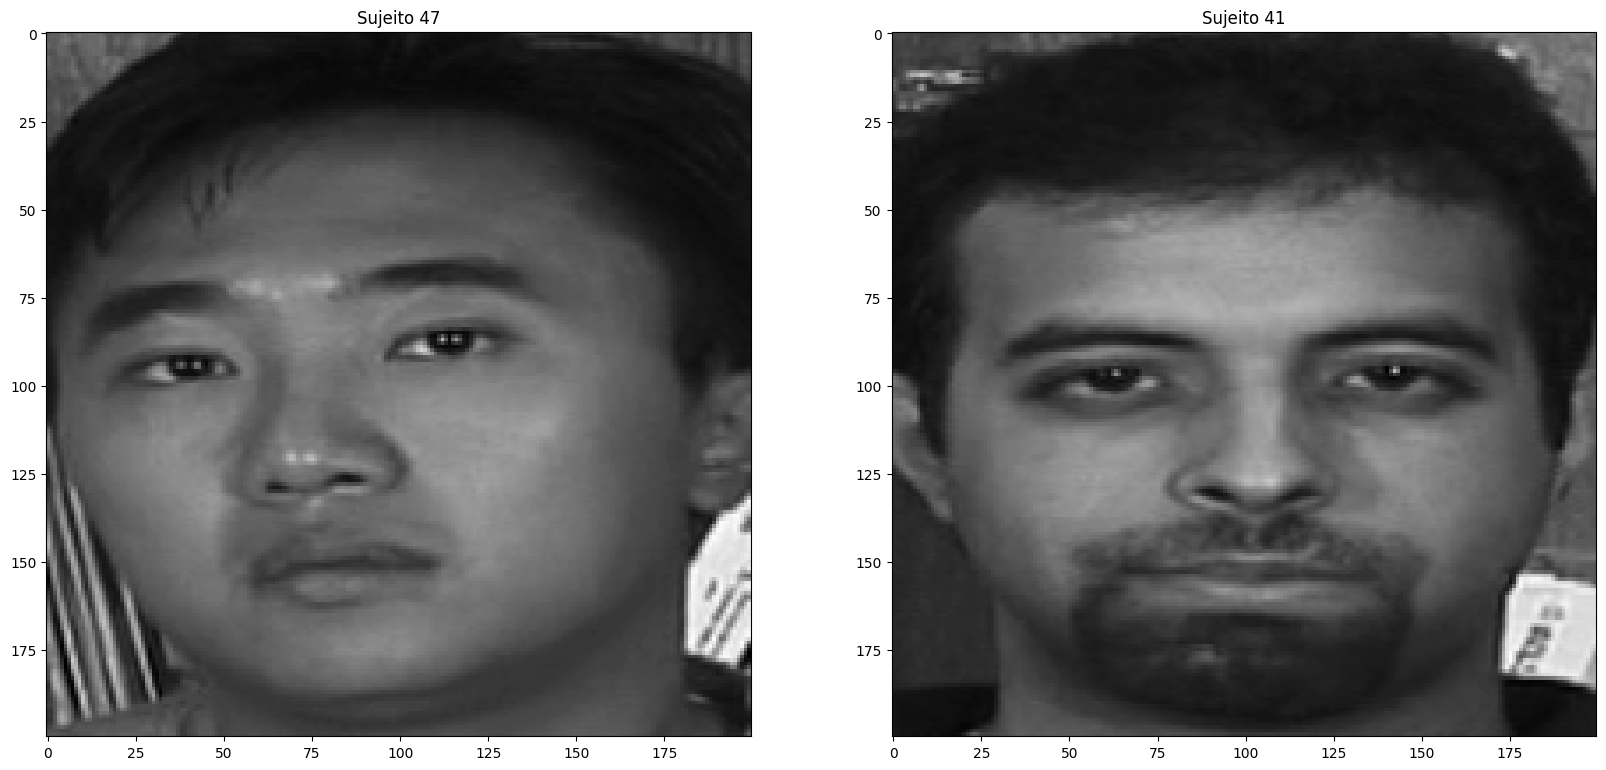

In [36]:
plt.figure(figsize=(20,10))

plt.subplot(121)
plt.title("Sujeito " + str(sujeitos_teste[6]))
plt.imshow(dados_teste[6], cmap="gray")

plt.subplot(122)
plt.title("Sujeito " + str(sujeitos_teste[7]))
plt.imshow(dados_teste[7], cmap="gray")

plt.show()

Compare this to the output of the classifier.
```Python
predicao = modelo_eingenfaces.predict(dados_teste[6])
predicao
```

In [37]:
predicao = modelo_eingenfaces.predict(dados_teste[6])
predicao

(47, 4280.3628760967)

```Python
predicao = modelo_eingenfaces.predict(dados_teste[7])
predicao
```

In [38]:
predicao = modelo_eingenfaces.predict(dados_teste[7])
predicao

(33, 6278.518410138202)

Perform the same process for  `modelo_fisherfaces = cv2.face.FisherFaceRecognizer_create()`

In [39]:
modelo_fisherfaces = cv2.face.FisherFaceRecognizer_create()

In [40]:
modelo_fisherfaces.train(dados_treinamento, sujeitos)

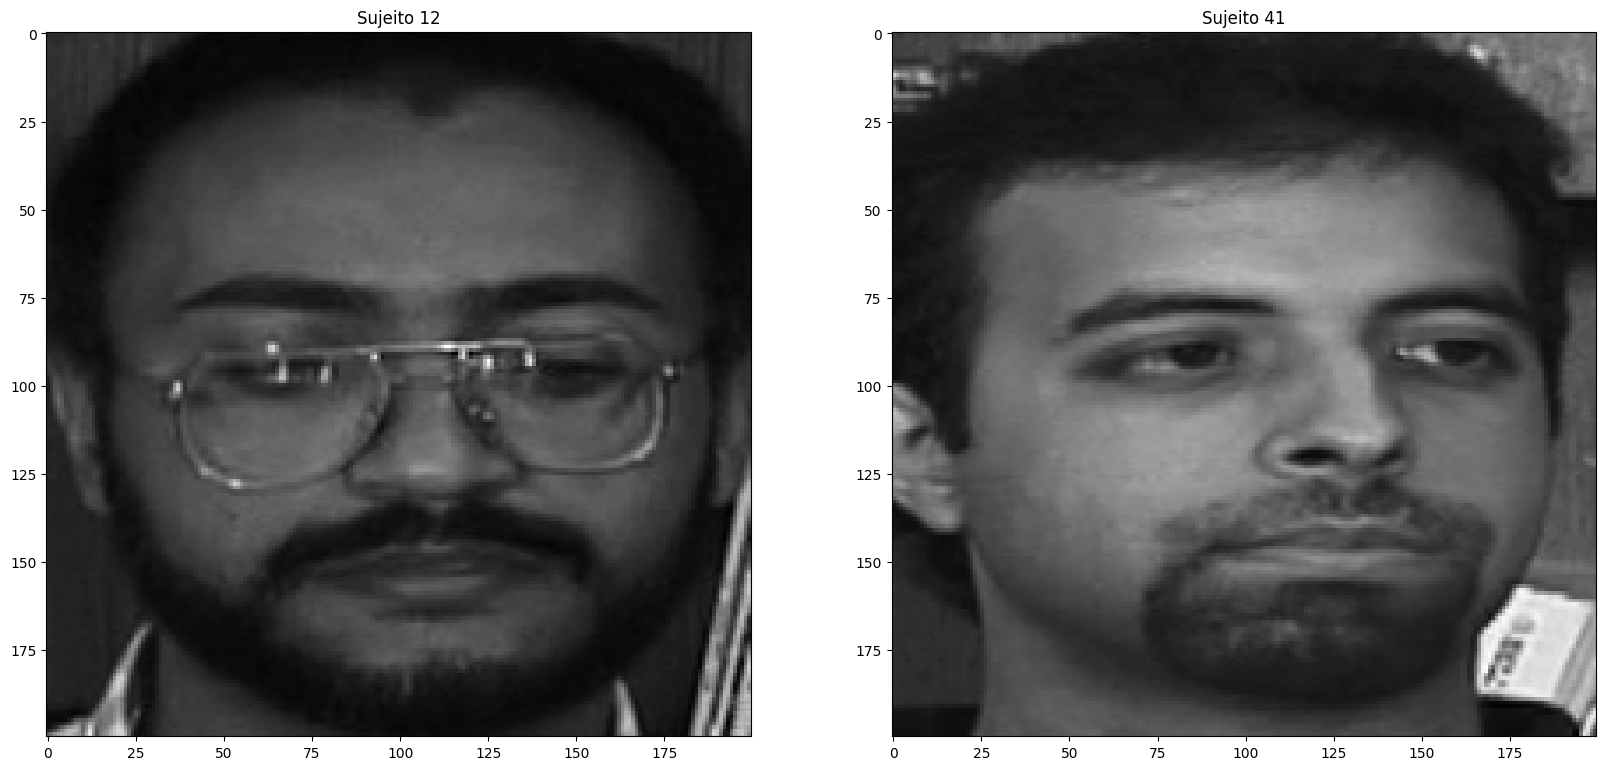

In [41]:
plt.figure(figsize=(20,10))

plt.subplot(121)
plt.title("Sujeito " + str(sujeitos_teste[13]))
plt.imshow(dados_teste[13], cmap="gray")

plt.subplot(122)
plt.title("Sujeito " + str(sujeitos_teste[19]))
plt.imshow(dados_teste[19], cmap="gray")

plt.show()

In [42]:
predicao = modelo_fisherfaces.predict(dados_teste[13])
predicao

(32, 971.9361828241223)

In [44]:
predicao = modelo_fisherfaces.predict(dados_teste[19])
predicao

(33, 1352.2013350955735)

Perform the same process for `modelo_lbph = cv2.face.LBPHFaceRecognizer_create()`

In [45]:
modelo_lbph = cv2.face.LBPHFaceRecognizer_create()

In [46]:
modelo_lbph.train(dados_treinamento, sujeitos)

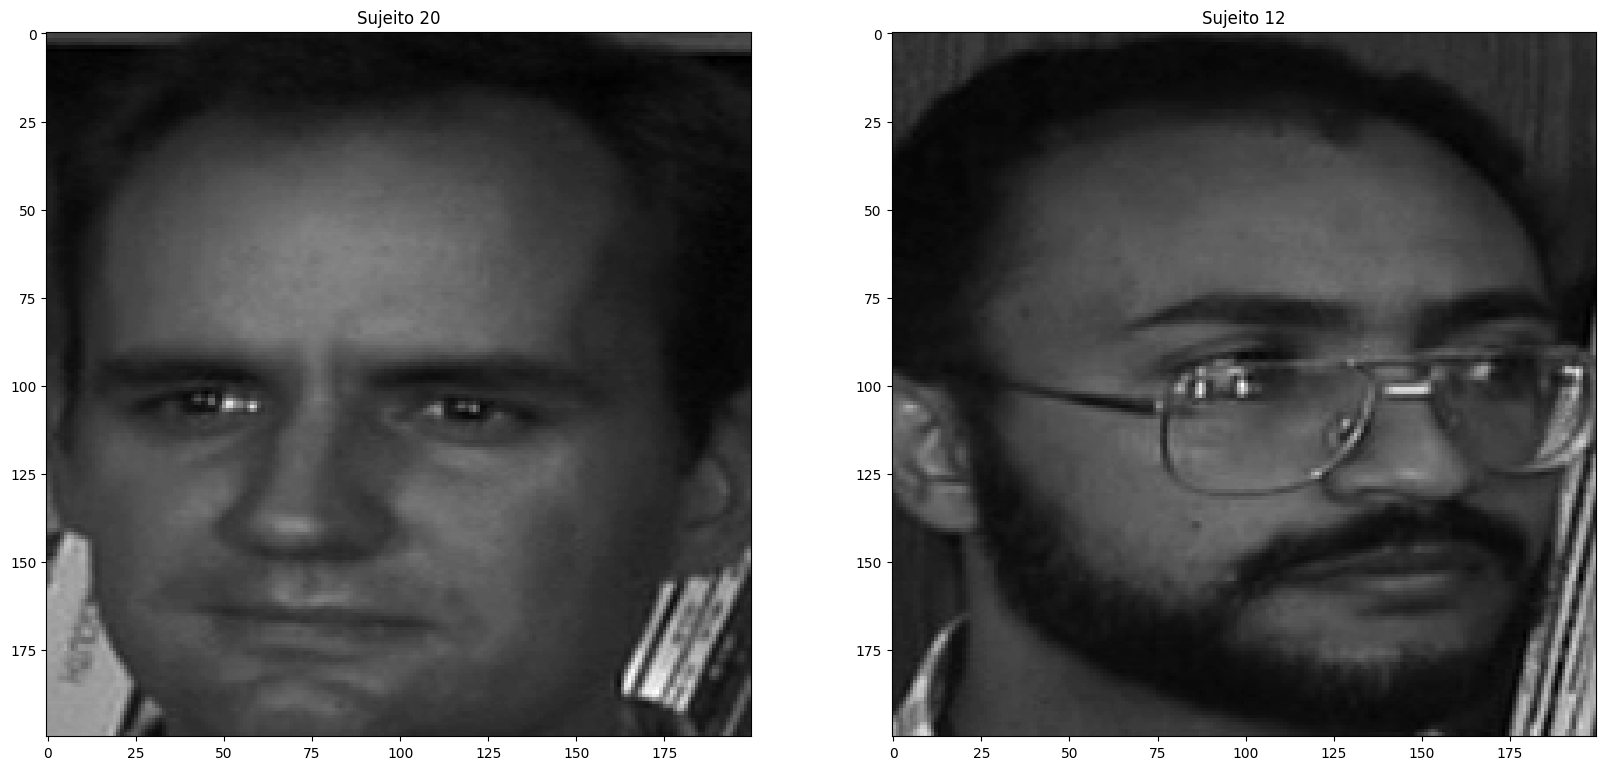

In [47]:
plt.figure(figsize=(20,10))

plt.subplot(121)
plt.title("Sujeito " + str(sujeitos_teste[21]))
plt.imshow(dados_teste[21], cmap="gray")

plt.subplot(122)
plt.title("Sujeito " + str(sujeitos_teste[27]))
plt.imshow(dados_teste[27], cmap="gray")

plt.show()

In [48]:
predicao = modelo_lbph.predict(dados_teste[21])
predicao

(20, 33.18464544832089)

In [50]:
predicao = modelo_lbph.predict(dados_teste[27])
predicao

(1, 46.74826528851241)

Determine the effectiveness of the eingenfaces classifier
```Python
y_pred_eingenfaces = []
for item in dados_teste:
    y_pred_eingenfaces.append(modelo_eingenfaces.predict(item)[0])
acuracia_eingenfaces = accuracy_score(sujeitos_teste, y_pred_eingenfaces)
acuracia_eingenfaces
```

In [53]:
y_pred_eingenfaces = []
for item in dados_teste:
    y_pred_eingenfaces.append(modelo_eingenfaces.predict(item)[0])
acuracia_eingenfaces = accuracy_score(sujeitos_teste, y_pred_eingenfaces)
acuracia_eingenfaces

0.724

Do the same for the other classifiers

In [54]:
y_pred_fisherfaces = []
for item in dados_teste:
    y_pred_fisherfaces.append(modelo_fisherfaces.predict(item)[0])
acuracia_fisherfaces = accuracy_score(sujeitos_teste, y_pred_fisherfaces)
acuracia_fisherfaces

0.52

In [ ]:
y_pred_lbph = []
for item in dados_teste:
    y_pred_lbph.append(modelo_lbph.predict(item)[0])
acuracia_lbph = accuracy_score(sujeitos_teste, y_pred_lbph)
acuracia_lbph

In [101]:
for item in dados_teste:
    y_pred_lbph.append(modelo_lbph.predict(item)[0])

In [102]:
acuracia_lbph = accuracy_score(sujeitos_teste, y_pred_lbph)

In [103]:
acuracia_lbph

0.792